## 1-exploration

Accompanying the paper:<br>
A. J. Lundervold, ..., A. Lundervold. _Decoding IBS: A Machine Learning Approach to Psychological Distress and Gut-Brain Interaction_

Arvid Lundervold, v. 2024-07-21  - using conda kernel `ibs` (Python 3.11.9)) 

Last updated: 2024-07-22


### Import libraries

In [1]:
%matplotlib inline

In [2]:
import os
import numpy as np
import pandas as pd
import pyreadstat
import matplotlib.pyplot as plt
import seaborn as sns
import pycaret
import ydata_profiling
from ydata_profiling import ProfileReport
import platform
import shutil
import warnings
import datetime
import pingouin as pg

home = os.path.expanduser('~')

In [4]:
if platform.system() == 'Darwin':
    print(f'OK, you are running on MacOS ({platform.version()})')
if platform.system() == 'Linux':
    print(f'OK, you are running on Linux ({platform.version()})')
if platform.system() == 'Windows':
    print(f'OK, but consider to install WSL for Windows10/11 since you are running on {platform.system()}')
    print('Check https://learn.microsoft.com/en-us/windows/wsl/install')

OK, you are running on MacOS (Darwin Kernel Version 23.5.0: Wed May  1 20:09:52 PDT 2024; root:xnu-10063.121.3~5/RELEASE_X86_64)


In [5]:
# OPTIONAL: Extensive exploration using `ydata-profiling`

PROFILING = False

In [6]:
# Versions

print(f'seaborn: {sns.__version__}')
print(f'pandas: {pd.__version__}')
print(f'pycaret: {pycaret.__version__}')
print(f'ydata_profiling: {ydata_profiling.__version__}')
print(f'pingouin: {pg.__version__}')


seaborn: 0.13.2
pandas: 2.1.4
pycaret: 3.3.2
ydata_profiling: v4.9.0
pingouin: 0.5.4


##  Part I - Read the data

### Read the merged BGA_BIS_HADS_FSS_RBANS 77x14 data

In [7]:
dg = pd.read_csv('../data/BGA_IBS_SSS_B_H_F_R_77x14.csv')
dg

,BGA_ID,Category,Sex,TestAge,IBS_SSS,B1,B2,H1,H2,F1,F2,R1,R2
0,BGA_046,IBS,M,38.0,195.0,3.0,13.0,1.0,4.0,3.0,0.0,37.0,63.0
1,BGA_051,IBS,M,38.0,293.0,8.0,4.0,2.0,3.0,5.0,0.0,36.0,71.0
2,BGA_057,IBS,F,30.0,264.0,14.0,20.0,7.0,1.0,6.0,2.0,35.0,63.0
3,BGA_058,IBS,F,57.0,296.0,8.0,12.0,7.0,7.0,7.0,4.0,37.0,51.0
4,BGA_059,IBS,F,43.0,364.0,7.0,6.0,13.0,6.0,1.0,1.0,30.0,55.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,BGA_160,IBS,F,23.0,265.0,11.0,13.0,12.0,4.0,4.0,1.0,20.0,46.0
73,BGA_161,IBS,F,21.0,393.0,0.0,3.0,8.0,1.0,5.0,2.0,35.0,51.0
74,BGA_164,HC,F,25.0,12.0,2.0,3.0,11.0,7.0,3.0,0.0,40.0,66.0
75,BGA_171,HC,M,21.0,32.0,3.0,13.0,8.0,2.0,2.0,1.0,35.0,66.0


### OPTIONAL: Extensive exploration using `ydata-profiling`

In [8]:
if PROFILING:
    profile = ProfileReport(dg, title="Profiling Report of the B H F R aggregated Data")

In [9]:
#  Displaying the report as a set of widgets in the Jupyter Notebook
if PROFILING:
    profile.to_widgets()

## Explorative analysis of the dataframe `dg`

In [10]:
dg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   BGA_ID    77 non-null     object 
 1   Category  77 non-null     object 
 2   Sex       77 non-null     object 
 3   TestAge   77 non-null     float64
 4   IBS_SSS   77 non-null     float64
 5   B1        77 non-null     float64
 6   B2        77 non-null     float64
 7   H1        77 non-null     float64
 8   H2        77 non-null     float64
 9   F1        77 non-null     float64
 10  F2        77 non-null     float64
 11  R1        77 non-null     float64
 12  R2        77 non-null     float64
dtypes: float64(10), object(3)
memory usage: 7.9+ KB


In [11]:
print(dg.columns.to_list())

['BGA_ID', 'Category', 'Sex', 'TestAge', 'IBS_SSS', 'B1', 'B2', 'H1', 'H2', 'F1', 'F2', 'R1', 'R2']


In [12]:
# Get number of subjects in each group
nIBS = dg['Category'].value_counts()[0]
nHC = dg['Category'].value_counts()[1]
nIBS, nHC

(49, 28)

#### Make feature plots per Category (IBS vs. HC)

In [13]:
my_palette = {"IBS": "r", "HC": "b"}  # "b" is blue, "r" is red

def feature_plot_by_group(feature, df):
    # Usual boxplot
    ax = sns.boxplot(x='Category', y=feature, data=df, palette=my_palette)
    # Add jitter with the swarmplot function
    ax = sns.swarmplot(x='Category', y=feature, data=df, color="grey")
    plt.title(f'{feature}')
    plt.show()

Feature 1: TestAge (dtype=float64)


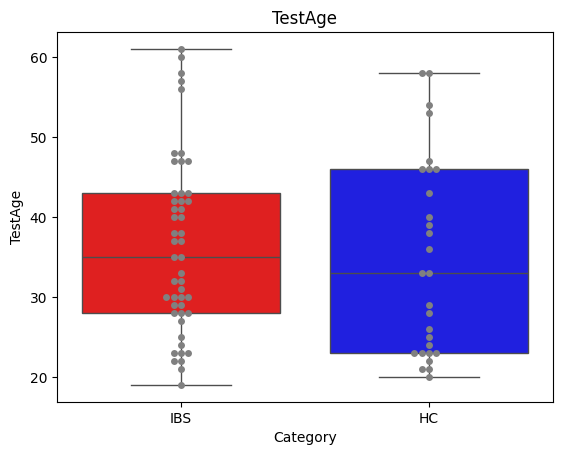

Feature 2: IBS_SSS (dtype=float64)


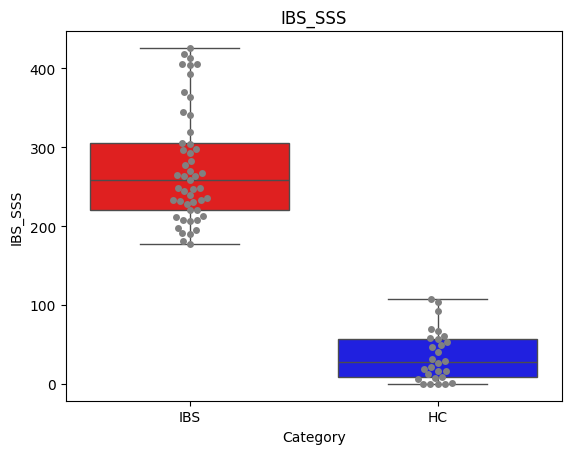

Feature 3: B1 (dtype=float64)


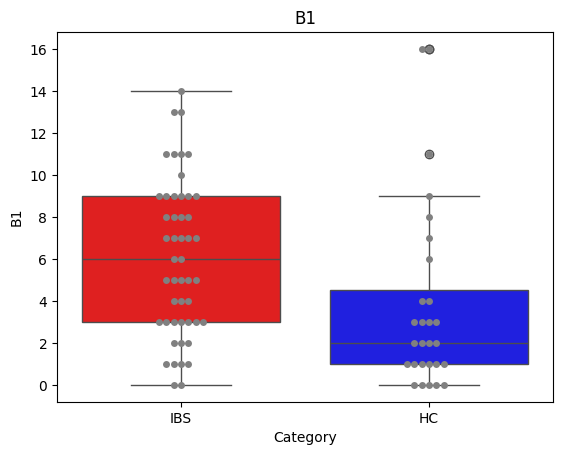

Feature 4: B2 (dtype=float64)


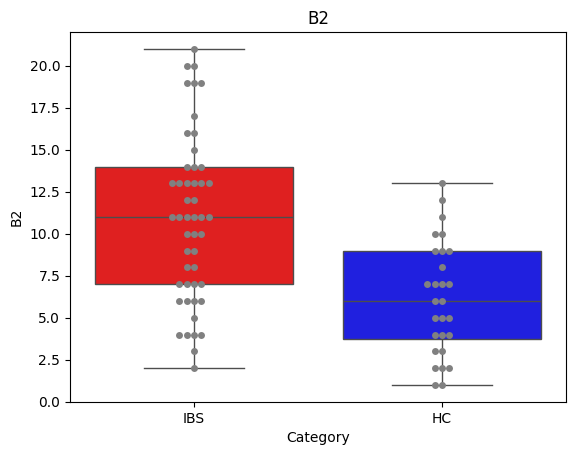

Feature 5: H1 (dtype=float64)


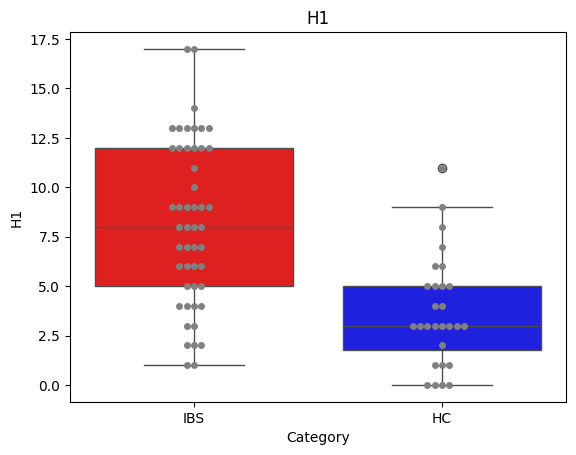

Feature 6: H2 (dtype=float64)


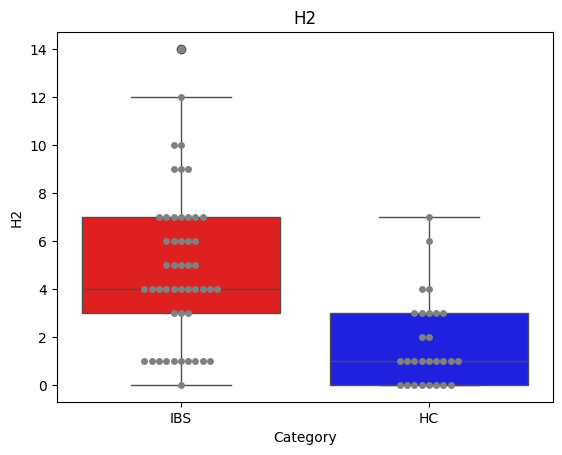

Feature 7: F1 (dtype=float64)


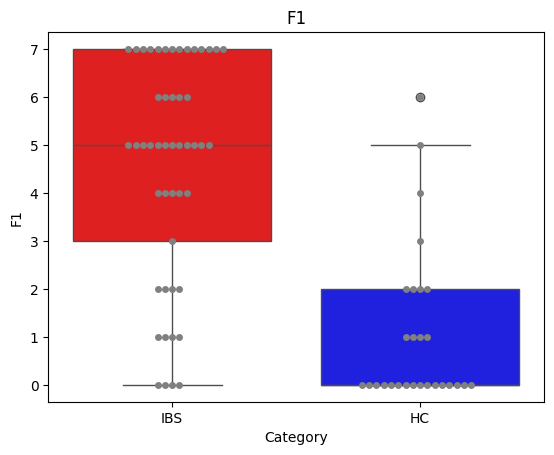

Feature 8: F2 (dtype=float64)


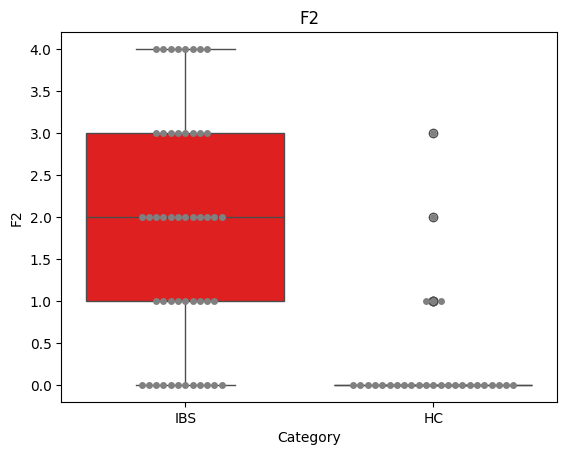

Feature 9: R1 (dtype=float64)


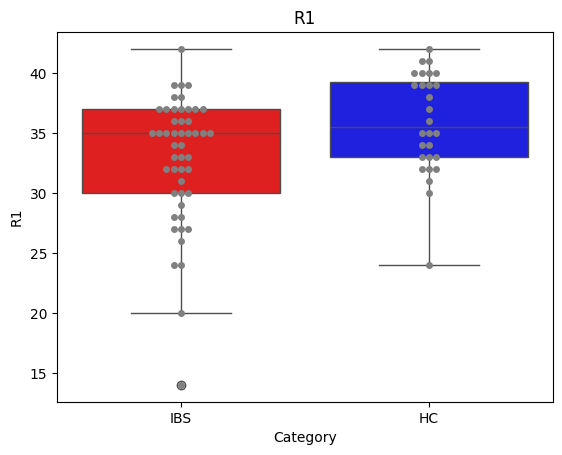

Feature 10: R2 (dtype=float64)


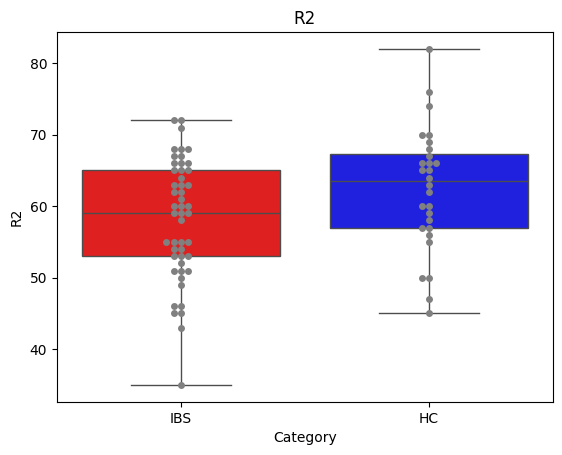

In [14]:
for i, feature in enumerate([item for item in list(dg.columns) if item not in ['BGA_ID', 'Category', 'Sex']]):
    print(f'Feature {i+1}: {feature} (dtype={dg[feature].dtype})')
    # Convert object  to int64
    if dg[feature].dtype == 'object':
        dg[feature] = dg[feature].astype('int64')
    feature_plot_by_group(feature, dg)

## Part II: Production of Tables and Figures in the paper

In [15]:
dg.describe().round(3)

,TestAge,IBS_SSS,B1,B2,H1,H2,F1,F2,R1,R2
count,77.000,77.000,77.000,77.000,77.000,77.000,77.000,77.000,77.000,77.000
mean,35.883,188.208,5.221,9.169,6.571,3.753,3.286,1.260,33.909,59.701
std,11.435,130.609,4.109,4.985,4.290,3.117,2.689,1.409,5.146,8.669
min,19.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,14.000,35.000
25%,26.000,53.000,2.000,5.000,3.000,1.000,0.000,0.000,32.000,54.000
50%,35.000,213.000,4.000,9.000,6.000,4.000,4.000,1.000,35.000,60.000
75%,43.000,270.000,8.000,13.000,9.000,6.000,6.000,2.000,37.000,66.000
max,61.000,426.000,16.000,21.000,17.000,14.000,7.000,4.000,42.000,82.000


In [16]:
# Compute group-wise mean ands standard deviation for IBS and HC across all variables 

variables = ['Category', 'TestAge', 'IBS_SSS', 'B1', 'B2', 'H1', 'H2', 'F1', 'F2', 'R1', 'R2']

dg[variables].groupby('Category').agg(['mean', 'std']).round(3).T


Category          HC      IBS
TestAge mean  34.929   36.429
        std   12.356   10.970
IBS_SSS mean  35.821  275.286
        std   32.259   71.678
B1      mean   3.821    6.020
        std    4.489    3.688
B2      mean   6.143   10.898
        std    3.374    4.955
H1      mean   3.714    8.204
        std    2.800    4.153
H2      mean   1.750    4.898
        std    1.858    3.124
F1      mean   1.071    4.551
        std    1.654    2.328
F2      mean   0.286    1.816
        std    0.713    1.409
R1      mean  35.857   32.796
        std    4.223    5.331
R2      mean  62.393   58.163
        std    8.638    8.390

In [17]:
# Compute group-wise percentile for IBS and HC across all variables

dg[variables].groupby('Category').quantile([0.25, 0.5, 0.75]).round(3).T

Category     HC                 IBS              
           0.25  0.50   0.75   0.25   0.50   0.75
TestAge   23.00  33.0  46.00   28.0   35.0   43.0
IBS_SSS    8.75  27.5  57.25  221.0  258.0  305.0
B1         1.00   2.0   4.50    3.0    6.0    9.0
B2         3.75   6.0   9.00    7.0   11.0   14.0
H1         1.75   3.0   5.00    5.0    8.0   12.0
H2         0.00   1.0   3.00    3.0    4.0    7.0
F1         0.00   0.0   2.00    3.0    5.0    7.0
F2         0.00   0.0   0.00    1.0    2.0    3.0
R1        33.00  35.5  39.25   30.0   35.0   37.0
R2        57.00  63.5  67.25   53.0   59.0   65.0

In [18]:
# Make a new dataframe with group-wise summary statistics for IBS and HC rgarding mean, std, and median with 2 decimals   

variables_1 = ['Category', 'TestAge', 'IBS_SSS']
variables_2 = ['Category', 'B1', 'B2', 'H1', 'H2', 'F1', 'F2', 'R1', 'R2']

dg_summary_1 = dg[variables_1].groupby('Category').agg(['mean', 'std', 'median']).round(2)
dg_summary_1 

TestAge               IBS_SSS              
            mean    std median    mean    std median
Category                                            
HC         34.93  12.36   33.0   35.82  32.26   27.5
IBS        36.43  10.97   35.0  275.29  71.68  258.0

In [19]:
dg_summary_2 = dg[variables_2].groupby('Category').agg(['mean', 'std', 'median']).round(2)
dg_summary_2

B1                  B2                 H1                 H2  ...  \
          mean   std median   mean   std median  mean   std median  mean  ...   
Category                                                                  ...   
HC        3.82  4.49    2.0   6.14  3.37    6.0  3.71  2.80    3.0  1.75  ...   
IBS       6.02  3.69    6.0  10.90  4.95   11.0  8.20  4.15    8.0  4.90  ...   

             F1    F2                  R1                  R2               
         median  mean   std median   mean   std median   mean   std median  
Category                                                                    
HC          0.0  0.29  0.71    0.0  35.86  4.22   35.5  62.39  8.64   63.5  
IBS         5.0  1.82  1.41    2.0  32.80  5.33   35.0  58.16  8.39   59.0  

[2 rows x 24 columns]

In [20]:
# Make non-parmetric testing using Mann-Whitney U test (Wilcoxon rank-sum test) between IBS and HC across all variables

from scipy.stats import mannwhitneyu

def mannwhitneyu_test(df, group, variables):
    for var in variables:
        stat, p = mannwhitneyu(df[df['Category'] == 'IBS'][var], df[df['Category'] == 'HC'][var])

        #print(f'{var}: \t stat: {stat}, p-value: {p:.4f}')
        if p < 0.001:
            print(f'{var[:6]}:\t stat: {stat},\t p-value: < 0.001')
        else:
            print(f'{var[:6]}:\t stat: {stat},\t p-value:{p:.3f}')

# Make a parametric t-test between IBS and HC across all variables
        
def ttest_test(df, group, variables):
    for var in variables:
        result_ttest = pg.ttest(df[df['Category'] == 'IBS'][var], df[df['Category'] == 'HC'][var], paired=False)
        if result_ttest["p-val"].values[0] < 0.001:
            print(f'{var}: \t p-value: < 0.001')
        else:
            print(f'{var}: \t p-value: {result_ttest["p-val"].values[0]:.3f}')



In [21]:
# Do the testing 
        
variables = ['TestAge', 'IBS_SSS', 'B1', 'B2', 'H1', 'H2', 'F1', 'F2', 'R1', 'R2']

print('Mann-Whitney U test between IBS and HC across all variables ...\n')   
mannwhitneyu_test(dg, 'Category', variables)

print('\n\nTwo-sample t-test between IBS and HC across all variables ...\n')
ttest_test(dg, 'Category', variables)



Mann-Whitney U test between IBS and HC across all variables ...

TestAg:	 stat: 759.5,	 p-value:0.439
IBS_SS:	 stat: 1372.0,	 p-value: < 0.001
B1:	 stat: 961.5,	 p-value:0.003
B2:	 stat: 1068.0,	 p-value: < 0.001
H1:	 stat: 1111.0,	 p-value: < 0.001
H2:	 stat: 1119.5,	 p-value: < 0.001
F1:	 stat: 1191.5,	 p-value: < 0.001
F2:	 stat: 1120.5,	 p-value: < 0.001
R1:	 stat: 457.5,	 p-value:0.015
R2:	 stat: 508.0,	 p-value:0.060


Two-sample t-test between IBS and HC across all variables ...

TestAge: 	 p-value: 0.596
IBS_SSS: 	 p-value: < 0.001
B1: 	 p-value: 0.033
B2: 	 p-value: < 0.001
H1: 	 p-value: < 0.001
H2: 	 p-value: < 0.001
F1: 	 p-value: < 0.001
F2: 	 p-value: < 0.001
R1: 	 p-value: 0.007
R2: 	 p-value: 0.041


In [22]:
# Describe dg for IBS and HC separately

# Headings for the table
headings = ['Group', 'Age', 'IBS-SSS', 'B1', 'B2', 'H1', 'H2', 'F1', 'F2', 'R1', 'R2']

dg_IBS = dg[dg['Category'] == 'IBS']
dg_HC = dg[dg['Category'] == 'HC']

dg_IBS.describe().round(3)

#dg_HC.describe(['mean','std','50%']).round(3)
desc_stats_IBS = dg_IBS.describe(percentiles=[0.5]).round(3)
selected_stats_IBS = desc_stats_IBS.loc[['mean', 'std', '50%']].round(2)

selected_stats_IBS_short = selected_stats_IBS[variables]
selected_stats_IBS_short.columns = headings[1:]
selected_stats_IBS_short.index = ['mean', 'std', 'median'] 

In [23]:
#dg_HC.describe(['mean','std','50%']).round(3)
desc_stats_HC = dg_HC.describe(percentiles=[0.5]).round(3)
selected_stats_HC = desc_stats_HC.loc[['mean', 'std', '50%']].round(2)
selected_stats_HC_short = selected_stats_HC[variables] 
selected_stats_HC_short.columns = headings[1:]
selected_stats_HC_short.index = ['mean', 'std', 'median']   

In [24]:
dg_mwu = pd.DataFrame(columns=headings[1:])

variables = ['TestAge', 'IBS_SSS', 'B1', 'B2', 'H1', 'H2', 'F1', 'F2', 'R1', 'R2']
for i, var in enumerate(variables):
    stat, p = mannwhitneyu(dg[dg['Category'] == 'IBS'][var], dg[dg['Category'] == 'HC'][var])
    var_new = headings[i+1]
    if p < 0.001:
        #print(f'{var[:6]}:\t stat: {stat},\t p-value: < 0.001')
        dg_mwu.at[0, var_new] = '< 0.001'
    else:
        #print(f'{var[:6]}:\t stat: {stat},\t p-value:{p:.3f}') 
        dg_mwu.at[0, var_new]= f'{p:.3f}' 
 
dg_mwu


,Age,IBS-SSS,B1,B2,H1,H2,F1,F2,R1,R2
0,0.439,< 0.001,0.003,< 0.001,< 0.001,< 0.001,< 0.001,< 0.001,0.015,0.060


### Table 2 in the paper ($LaTeX$)

In [25]:
print(selected_stats_IBS_short.to_latex(index=True, float_format="{:0.2f}".format))

\begin{tabular}{lrrrrrrrrrr}
\toprule
 & Age & IBS-SSS & B1 & B2 & H1 & H2 & F1 & F2 & R1 & R2 \\
\midrule
mean & 36.43 & 275.29 & 6.02 & 10.90 & 8.20 & 4.90 & 4.55 & 1.82 & 32.80 & 58.16 \\
std & 10.97 & 71.68 & 3.69 & 4.96 & 4.15 & 3.12 & 2.33 & 1.41 & 5.33 & 8.39 \\
median & 35.00 & 258.00 & 6.00 & 11.00 & 8.00 & 4.00 & 5.00 & 2.00 & 35.00 & 59.00 \\
\bottomrule
\end{tabular}



In [26]:
# Print to latex with 2 decimals
print(selected_stats_HC_short.to_latex(index=True, float_format="{:0.2f}".format))


\begin{tabular}{lrrrrrrrrrr}
\toprule
 & Age & IBS-SSS & B1 & B2 & H1 & H2 & F1 & F2 & R1 & R2 \\
\midrule
mean & 34.93 & 35.82 & 3.82 & 6.14 & 3.71 & 1.75 & 1.07 & 0.29 & 35.86 & 62.39 \\
std & 12.36 & 32.26 & 4.49 & 3.37 & 2.80 & 1.86 & 1.65 & 0.71 & 4.22 & 8.64 \\
median & 33.00 & 27.50 & 2.00 & 6.00 & 3.00 & 1.00 & 0.00 & 0.00 & 35.50 & 63.50 \\
\bottomrule
\end{tabular}



In [27]:
print(dg_mwu.to_latex(index=True))  #, float_format="{:0.2f}".format)))

\begin{tabular}{lllllllllll}
\toprule
 & Age & IBS-SSS & B1 & B2 & H1 & H2 & F1 & F2 & R1 & R2 \\
\midrule
0 & 0.439 & < 0.001 & 0.003 & < 0.001 & < 0.001 & < 0.001 & < 0.001 & < 0.001 & 0.015 & 0.060 \\
\bottomrule
\end{tabular}



### Figure 1 in the paper (pairplot of a subset of the data frame `dg`)

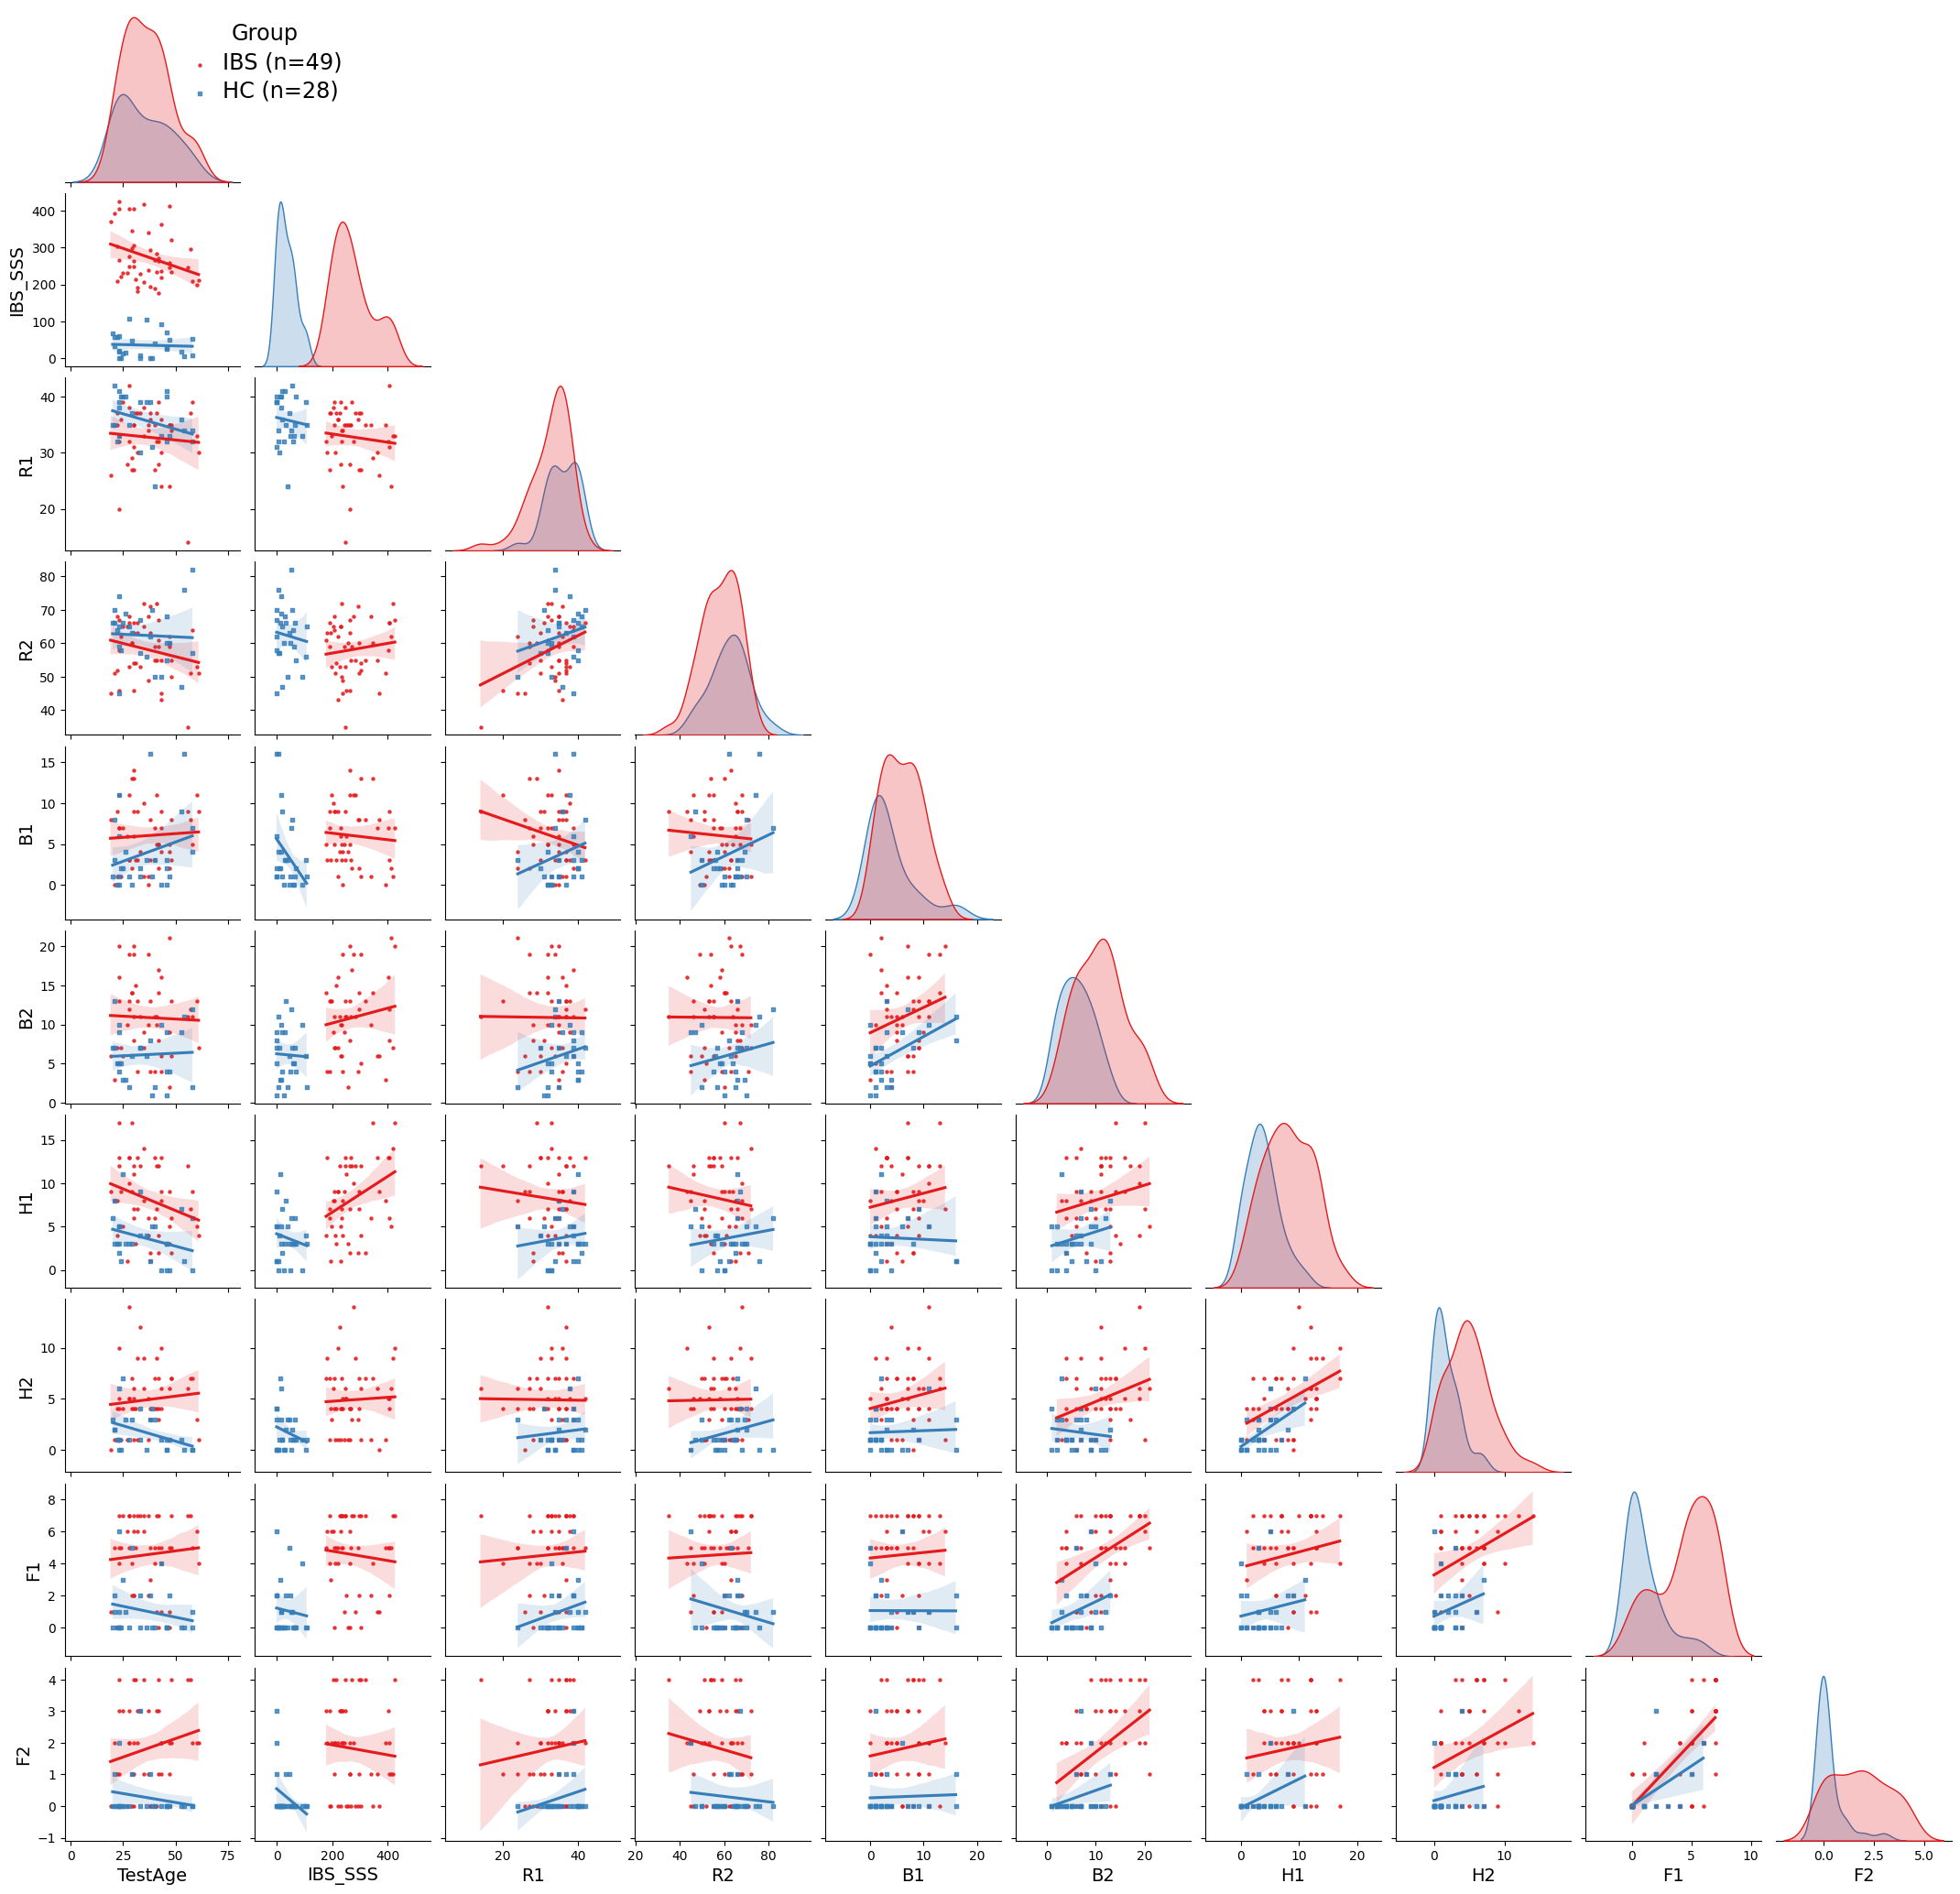

In [28]:
import seaborn as sns

# Select a subset of the DataFrame with the columns to include in the plot
varnames = ['Category', 'Sex', 'TestAge', 'IBS_SSS', 'R1', 'R2', 'B1', 'B2', 'H1', 'H2', 'F1', 'F2']
dg_subset = dg[varnames].copy()


# Create a pairplot colored by 'Category' and 'Sex'
pairplot = sns.pairplot(dg_subset, hue='Category', markers=["o", "s"], palette="Set1", diag_kind='kde', kind='reg', plot_kws={'scatter_kws': {'s': 5}}, corner=True)

# Iterate over the axes array and set the font sizes
for i in range(pairplot.axes.shape[0]):  # for each row
    for j in range(pairplot.axes.shape[1]):  # for each column
        # Set x-axis label font size for the last row
        if i == pairplot.axes.shape[0] - 1:
            pairplot.axes[i, j].set_xlabel(pairplot.axes[i, j].get_xlabel(), fontsize=14)
        # Set y-axis label font size for the first column
        if j == 0:
            pairplot.axes[i, j].set_ylabel(pairplot.axes[i, j].get_ylabel(), fontsize=14)

# Adjust the legend directly from the PairGrid object
plt.setp(pairplot._legend.get_texts(), fontsize='xx-large')  # for legend text
plt.setp(pairplot._legend.get_title(), fontsize='xx-large')  # for legend title

# Reposition the legend and add a title
pairplot._legend.set_bbox_to_anchor((0.15, 0.80)) # ((0.13, 0.95))  #['Category', 'Sex', 'TestAge', 'IBS_SSS', 'R1_var', 'R2_var', 'B1_var', 'B2_var', 'H1_var', 'H2_var', 'F1_var', 'F2_var'] Reposition the legend
pairplot._legend.set_title('Group')  # Add a title to the legend

# Edit legend labels
new_labels = [f'IBS (n={nIBS})', f'HC (n={nHC})']
for t, l in zip(pairplot._legend.texts, new_labels): t.set_text(l)

# Optionally, adjust the figure size to make sure labels fit well
plt.subplots_adjust(bottom=0.1, top=0.9, left=0.1, right=0.9)

# Show the plot
plt.show()

# Save plot to file
pairplot.savefig('../figs/Fig_1_pairplot_BGA_IBS_SSS_R_B_H_F_77x14.png')

In [29]:
dg_subset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Category  77 non-null     object 
 1   Sex       77 non-null     object 
 2   TestAge   77 non-null     float64
 3   IBS_SSS   77 non-null     float64
 4   R1        77 non-null     float64
 5   R2        77 non-null     float64
 6   B1        77 non-null     float64
 7   B2        77 non-null     float64
 8   H1        77 non-null     float64
 9   H2        77 non-null     float64
 10  F1        77 non-null     float64
 11  F2        77 non-null     float64
dtypes: float64(10), object(2)
memory usage: 7.3+ KB


## Correlation matrices

`DataFrame.corr(method='pearson', min_periods=1, numeric_only=False)`<br>
Compute pairwise correlation of columns, excluding NA/null values.

method{‘pearson’, ‘kendall’, ‘spearman’}<br>
Method of correlation:

- pearson : standard correlation coefficient
- kendall : Kendall Tau correlation coefficient
- spearman : Spearman rank correlation

In [30]:
# Make a new dataframe with the aggregated variables
dg_for_corr = dg[varnames].copy()

dg_for_corr = dg_for_corr.drop(['Sex'], axis=1)
dg_for_corr

,Category,TestAge,IBS_SSS,R1,R2,B1,B2,H1,H2,F1,F2
0,IBS,38.0,195.0,37.0,63.0,3.0,13.0,1.0,4.0,3.0,0.0
1,IBS,38.0,293.0,36.0,71.0,8.0,4.0,2.0,3.0,5.0,0.0
2,IBS,30.0,264.0,35.0,63.0,14.0,20.0,7.0,1.0,6.0,2.0
3,IBS,57.0,296.0,37.0,51.0,8.0,12.0,7.0,7.0,7.0,4.0
4,IBS,43.0,364.0,30.0,55.0,7.0,6.0,13.0,6.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
72,IBS,23.0,265.0,20.0,46.0,11.0,13.0,12.0,4.0,4.0,1.0
73,IBS,21.0,393.0,35.0,51.0,0.0,3.0,8.0,1.0,5.0,2.0
74,HC,25.0,12.0,40.0,66.0,2.0,3.0,11.0,7.0,3.0,0.0
75,HC,21.0,32.0,35.0,66.0,3.0,13.0,8.0,2.0,2.0,1.0


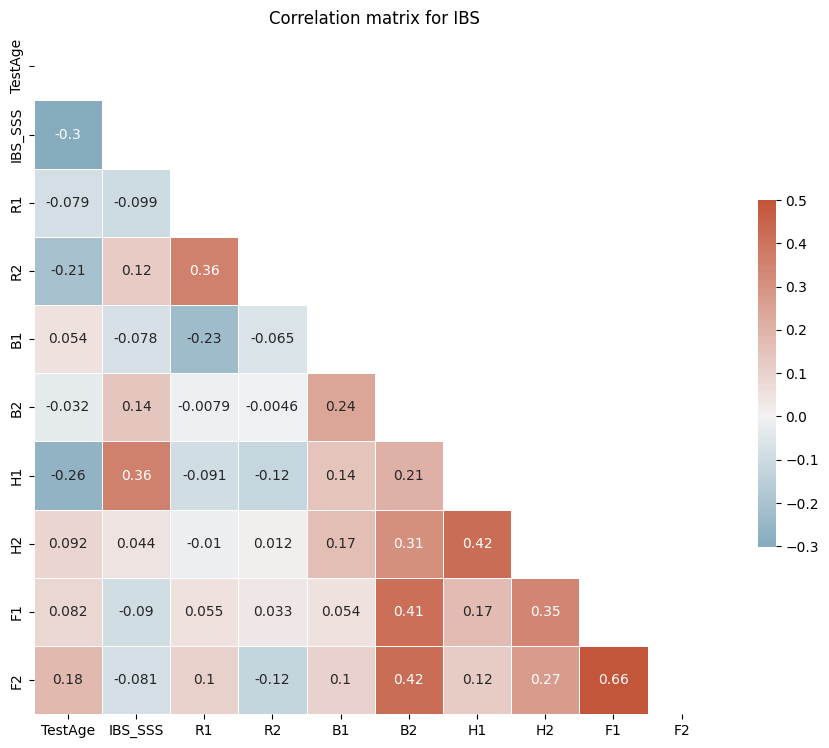

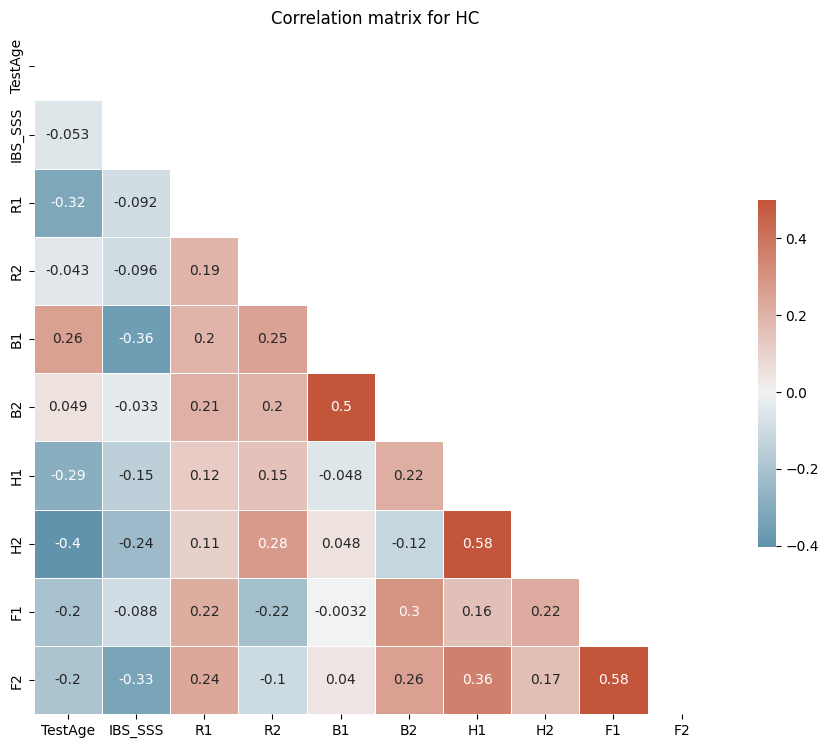

In [31]:
# Compute the correlation matrix for IBS and HC separately
corr_IBS = dg_for_corr[dg_for_corr['Category'] == 'IBS'].drop('Category', axis=1).corr()
corr_HC = dg_for_corr[dg_for_corr['Category'] == 'HC'].drop('Category', axis=1).corr()


# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr_IBS, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr_IBS, mask=mask, cmap=cmap, vmax=.5, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

plt.title('Correlation matrix for IBS')
plt.show()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr_HC, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr_HC, mask=mask, cmap=cmap, vmax=.5, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

plt.title('Correlation matrix for HC')
plt.show()


### Figure 2 in the paper (correlation heatmap))

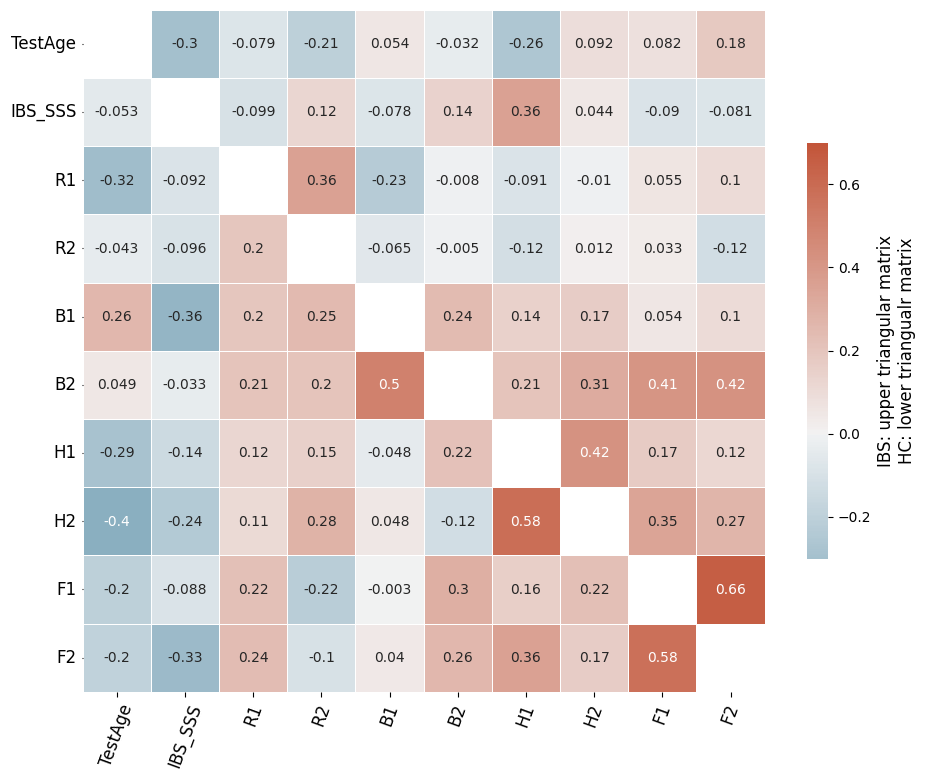

In [32]:
# Make these lower triangualr matrix plots a full matrix plot with the same color scale and the same color bar where the lower triangular is corr_IBS and upper triangular is corr_HC

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a mask for the lower triangle
mask_l = np.tril(np.ones_like(corr_IBS, dtype=bool))

# Generate a mask for the upper triangle
mask_u = np.triu(np.ones_like(corr_HC, dtype=bool))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask_l and correct aspect ratio and use 2 decimal places

sns.heatmap(corr_IBS.round(3), mask=mask_l, cmap=cmap, vmax=.7, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .6}, annot=True, annot_kws={"size": 10})

# Superimpose the heatmap with the mask_u and correct aspect ratio and omit ths colorbar
sns.heatmap(corr_HC.round(3), mask=mask_u, cmap=cmap, vmax=.7, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .6}, cbar=False, annot=True, annot_kws={"size": 10})

plt.xticks(rotation=70, fontsize=12) 
plt.yticks(rotation=0, fontsize=12)
# Shorter tickmarks on y-axis
plt.tick_params(axis='y', length=1) 

# Add title to the colorbar
cbar = ax.collections[0].colorbar

# Add title to the colorbar
cbar.set_label('IBS: upper triangular matrix\nHC: lower triangualr matrix', fontsize=12)  
#
#plt.title('Pearson correlation matrix for IBS (upper triangular) and for HC (lower triangular)')

plt.show()

# Save plot to file
f.savefig('../figs/Fig_2_correlation_heatmap_BGA_IBS_SSS_R_B_H_F_77x14.png')    


In [33]:
# Make these matrices as Latex tables, with 2 decimal places, and substitute _ with \_ in varibale names

print(corr_IBS.to_latex(index=True, float_format="%.2f").replace('_', '\_'))
print(corr_HC.to_latex(index=True, float_format="%.2f").replace('_', '\_'))


\begin{tabular}{lrrrrrrrrrr}
\toprule
 & TestAge & IBS\_SSS & R1 & R2 & B1 & B2 & H1 & H2 & F1 & F2 \\
\midrule
TestAge & 1.00 & -0.30 & -0.08 & -0.21 & 0.05 & -0.03 & -0.26 & 0.09 & 0.08 & 0.18 \\
IBS\_SSS & -0.30 & 1.00 & -0.10 & 0.12 & -0.08 & 0.14 & 0.36 & 0.04 & -0.09 & -0.08 \\
R1 & -0.08 & -0.10 & 1.00 & 0.36 & -0.23 & -0.01 & -0.09 & -0.01 & 0.05 & 0.10 \\
R2 & -0.21 & 0.12 & 0.36 & 1.00 & -0.06 & -0.00 & -0.12 & 0.01 & 0.03 & -0.12 \\
B1 & 0.05 & -0.08 & -0.23 & -0.06 & 1.00 & 0.24 & 0.14 & 0.17 & 0.05 & 0.10 \\
B2 & -0.03 & 0.14 & -0.01 & -0.00 & 0.24 & 1.00 & 0.21 & 0.31 & 0.41 & 0.42 \\
H1 & -0.26 & 0.36 & -0.09 & -0.12 & 0.14 & 0.21 & 1.00 & 0.42 & 0.17 & 0.12 \\
H2 & 0.09 & 0.04 & -0.01 & 0.01 & 0.17 & 0.31 & 0.42 & 1.00 & 0.35 & 0.27 \\
F1 & 0.08 & -0.09 & 0.05 & 0.03 & 0.05 & 0.41 & 0.17 & 0.35 & 1.00 & 0.66 \\
F2 & 0.18 & -0.08 & 0.10 & -0.12 & 0.10 & 0.42 & 0.12 & 0.27 & 0.66 & 1.00 \\
\bottomrule
\end{tabular}

\begin{tabular}{lrrrrrrrrrr}
\toprule
 & TestAge & IBS\_

In [34]:
dg_for_classification = dg.copy()
dg_for_classification['BGA'] = dg['BGA_ID']
dg_for_classification['Age'] = dg['TestAge']
dg_for_classification['IBS-SSS'] = dg['IBS_SSS']
dg_for_classification = dg_for_classification[['BGA', 'Sex', 'Age', 'IBS-SSS', 'R1', 'R2', 'B1', 'B2', 'H1', 'H2', 'F1', 'F2', 'Category']]    
dg_for_classification

,BGA,Sex,Age,IBS-SSS,R1,R2,B1,B2,H1,H2,F1,F2,Category
0,BGA_046,M,38.0,195.0,37.0,63.0,3.0,13.0,1.0,4.0,3.0,0.0,IBS
1,BGA_051,M,38.0,293.0,36.0,71.0,8.0,4.0,2.0,3.0,5.0,0.0,IBS
2,BGA_057,F,30.0,264.0,35.0,63.0,14.0,20.0,7.0,1.0,6.0,2.0,IBS
3,BGA_058,F,57.0,296.0,37.0,51.0,8.0,12.0,7.0,7.0,7.0,4.0,IBS
4,BGA_059,F,43.0,364.0,30.0,55.0,7.0,6.0,13.0,6.0,1.0,1.0,IBS
...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,BGA_160,F,23.0,265.0,20.0,46.0,11.0,13.0,12.0,4.0,4.0,1.0,IBS
73,BGA_161,F,21.0,393.0,35.0,51.0,0.0,3.0,8.0,1.0,5.0,2.0,IBS
74,BGA_164,F,25.0,12.0,40.0,66.0,2.0,3.0,11.0,7.0,3.0,0.0,HC
75,BGA_171,M,21.0,32.0,35.0,66.0,3.0,13.0,8.0,2.0,2.0,1.0,HC


In [35]:
# Save the dataframe to a csv file
dg_for_classification.to_csv('../data/BGA_for_classification_77x13.csv', index=False)

#### Extensive `ydata-profiling` of the new dataframe `dg_subset` 

In [36]:
if PROFILING:
    profile = ProfileReport(dg_for_classification, title="Profiling Report of aggregated features")

In [37]:
#  Displaying the report as a set of widgets in the Jupyter Notebook
if PROFILING:   
    profile.to_widgets()